# Geopandas


instalación
* ubuntu: pip install geopandas
* windows: conda install -c conda-forge geopandas

Documentación: http://geopandas.org

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
gdf = gpd.read_file('data/Municipios/')
gdf.head()


,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
type(gdf[['CVE_ENT','CVE_MUN','OID']])

pandas.core.frame.DataFrame

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 5 columns):
CVE_ENT     2456 non-null object
CVE_MUN     2456 non-null object
NOM_MUN     2456 non-null object
OID         2456 non-null int64
geometry    2456 non-null object
dtypes: int64(1), object(4)
memory usage: 96.0+ KB


In [6]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

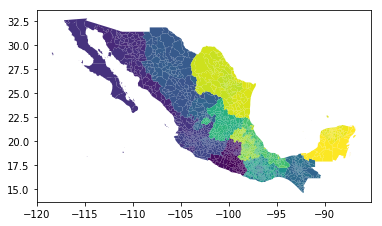

In [7]:
gdf.plot(column='OID')

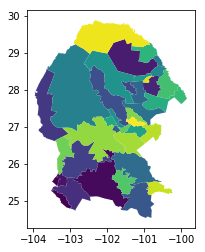

In [8]:

gdf = gdf.loc[gdf.CVE_ENT=='05',:]
gdf.plot(column='OID')


## Lectura

Casi cualquier formato de información geoespacial vectorial

In [9]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [10]:
gpd.read_file('data/delegaciones.json')

,cvegeo,municipio,geometry
0,9010,ALVARO OBREGON,"POLYGON ((-99.26899687 19.30463712, -99.269029..."
1,9002,AZCAPOTZALCO,"POLYGON ((-99.20688081 19.47120497, -99.207120..."
2,9014,BENITO JUAREZ,"POLYGON ((-99.18894424 19.39556665, -99.187556..."
3,9003,COYOACAN,"POLYGON ((-99.10069169 19.29984584, -99.103266..."
4,9004,CUAJIMALPA,"POLYGON ((-99.25561125999999 19.40427641, -99...."
5,9015,CUAUHTEMOC,"POLYGON ((-99.12572428 19.40425509, -99.127240..."
6,9005,GUSTAVO A MADERO,"POLYGON ((-99.07539946999999 19.44866099, -99...."
7,9006,IZTACALCO,"POLYGON ((-99.13541011 19.37723098, -99.134945..."
8,9007,IZTAPALAPA,"POLYGON ((-99.06164945 19.29332949, -99.061707..."
9,9008,MAGDALENA CONTRERAS,"POLYGON ((-99.24178889 19.28882408, -99.241656..."


## Administrando proyecciones, CRS (Coordinate Reference Systems)

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Text(0.5,1,'WGS84 (lat/lon)')

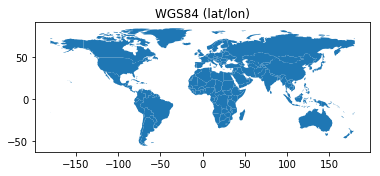

In [23]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)")

In [24]:
world.crs

{'init': 'epsg:4326'}

In [ ]:
# Re asignación
#world.crs = {'init' :'epsg:4326'}

In [25]:
## Re-proyeción
world = world.to_crs({'init': 'epsg:3395'})
world.crs


{'init': 'epsg:3395'}

Text(0.5,1,'Mercator')

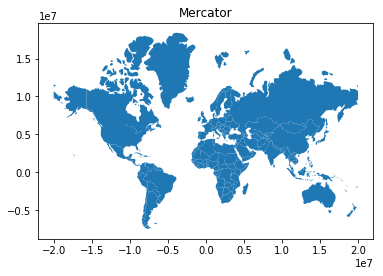

In [26]:
ax = world.plot()
ax.set_title("Mercator")

In [27]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((6813956.989691116 4227673.561898688,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((1817460.822852346 -651055.117933030...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((2292095.859226788 5110825.730490864,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((5741805.753758118 2765811.384651244,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-7291426.646959423 -7365665.1311332...


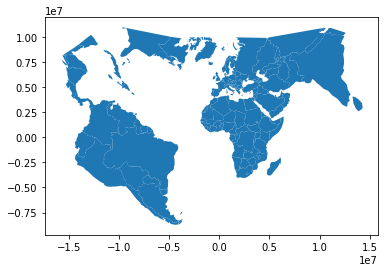

In [28]:
# Transverse mercator
world.to_crs({'proj': 'tmerc'}).plot()

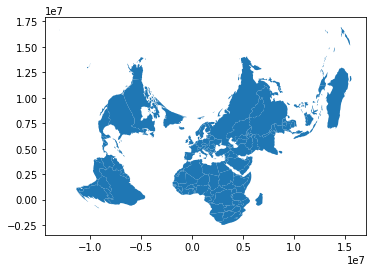

In [29]:
#Albert Equal Area
world.to_crs({'proj': 'aea'}).plot()

CRS are referred to using codes called proj4 strings. You can find the codes for most commonly used projections from www.spatialreference.org or remotesensing.org.

## Ok, qué es una geoserie?

In [5]:
from shapely.geometry import Point, LineString, \
            MultiPoint, MultiLineString, Polygon, MultiPolygon

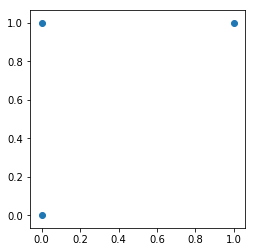

In [13]:
p1 = Point([0,0])
p2 = Point([0,1])
p3 = Point([1,1])
gpd.GeoSeries([p1,p2,p3]).plot()

In [15]:
l1 = LineString([[1,2],[2,0],[2,1]])
l2 = LineString([[3,1],[4,3]])
gpd.GeoSeries([l1,l2])

0    LINESTRING (1 2, 2 0, 2 1)
1         LINESTRING (3 1, 4 3)
dtype: object

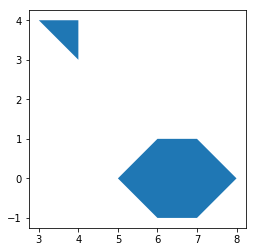

In [16]:
P1 = Polygon([[3,4],[4,3],[4,4]])
P2 = Polygon([[5,0],[6,-1],[7,-1],[8,0],[7,1],[6,1]])
gpd.GeoSeries([P1,P2]).plot()

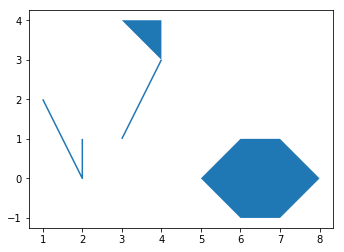

In [18]:
mp = MultiPoint([p1,p2,p3])
ml = MultiLineString([l1,l2])
mP = MultiPolygon([P1,P2])
gpd.GeoSeries([mp,ml,mP]).plot()

In [19]:
gpd.GeoSeries([mp,ml,mP])

0              (POINT (0 0), POINT (0 1), POINT (1 1))
1    (LINESTRING (1 2, 2 0, 2 1), LINESTRING (3 1, ...
2    (POLYGON ((3 4, 4 3, 4 4, 3 4)), POLYGON ((5 0...
dtype: object

In [20]:
## qué es un GeoDataFrame?

u = pd.DataFrame(np.random.random(size=[3,3]),columns=['A','B','C'])
u

,A,B,C
0,0.253508,0.284346,0.575920
1,0.517631,0.046070,0.299513
2,0.731640,0.498955,0.890522


In [21]:
u = gpd.GeoDataFrame(u, geometry = gpd.GeoSeries([mp,ml,mP]))
u


,A,B,C,geometry
0,0.253508,0.284346,0.575920,"(POINT (0 0), POINT (0 1), POINT (1 1))"
1,0.517631,0.046070,0.299513,"(LINESTRING (1 2, 2 0, 2 1), LINESTRING (3 1, ..."
2,0.731640,0.498955,0.890522,"(POLYGON ((3 4, 4 3, 4 4, 3 4)), POLYGON ((5 0..."


In [3]:
df = pd.read_csv('data/probe.probe').sample(10000)
df.head()

,Unnamed: 0,timestamp,x,y,speed,provider
739955,2111925,2017-03-30T03:54:43Z,-92.272708,14.901634,0.0,1
329245,481111,2017-03-30T00:45:46Z,-97.659204,18.874581,0.0,1
34264,11128068,2017-03-30T22:35:51Z,-103.326460,20.587517,0.0,4
567242,4993557,2017-03-30T12:52:17Z,-98.944279,19.374716,11.0,1
584615,2005017,2017-03-30T03:40:26Z,-99.172634,19.483471,10.0,1


In [6]:
def hacer_punto(row):
    p = Point(row.x,row.y)
    return p
df['geometry'] = df.apply(hacer_punto,axis=1)
df = gpd.GeoDataFrame(df,geometry='geometry')

In [32]:
type(df)

geopandas.geodataframe.GeoDataFrame

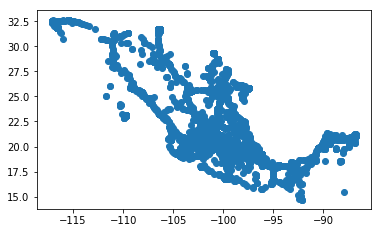

In [33]:
df.plot()

In [22]:
df.crs = {'init' :'epsg:4326'}

# Manipulaciones geometricas

In [36]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,05,035,Torre�n,2250,(POLYGON ((-103.4279682574413 25.3010926774777...
1,05,024,Parras,2251,"POLYGON ((-102.150401292488 26.42176909598752,..."
2,05,017,Matamoros,2252,POLYGON ((-103.2225245672591 25.75687150448032...
3,05,038,Zaragoza,2253,"POLYGON ((-101.8846877927711 28.7959789025173,..."
4,05,037,Villa Uni�n,2254,POLYGON ((-100.6635448364334 28.22782077655265...


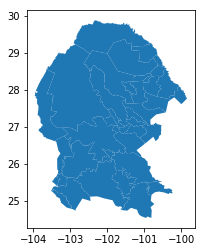

In [37]:
gdf.plot()

     CVE_ENT CVE_MUN   NOM_MUN   OID  \
2270      05     018  Monclova  2271   

                                               geometry  
2270  POLYGON ((-101.1170613923369 26.6996873077993,...  


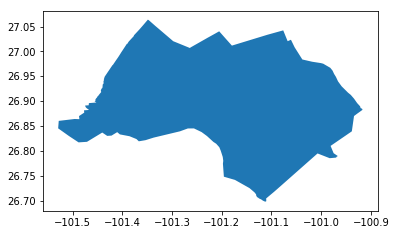

In [39]:
print(gdf.loc[gdf.NOM_MUN=='Monclova',:])
gdf.loc[gdf.NOM_MUN=='Monclova',:].plot()

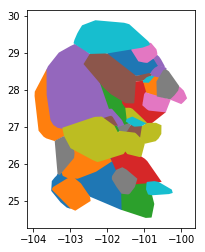

In [40]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.convex_hull
u.plot(column='OID')

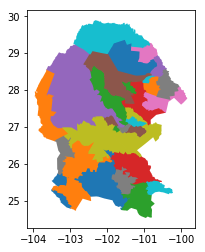

In [41]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.buffer(0.01)
u.plot(column='OID')

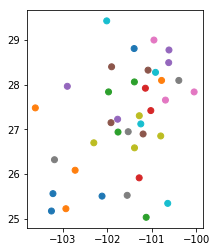

In [42]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.centroid
u.plot(column='OID')

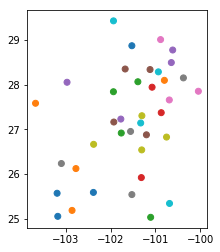

In [43]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.representative_point()
u.plot(column='OID')

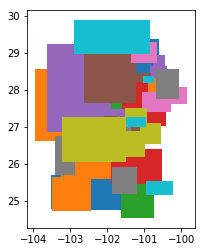

In [44]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.envelope
u.plot(column='OID')

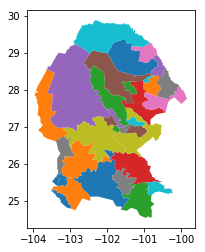

In [47]:
u = pd.DataFrame(gdf.values, columns= gdf.columns)
u = gpd.GeoDataFrame(u,geometry = u.geometry)
u.geometry = u.simplify(0.01
                       )
u.plot(column='OID')

## Atributos


In [48]:
gdf.area.head()   ### Unidades?

2249    0.114866
2250    0.953628
2251    0.072407
2252    0.733791
2253    0.170286
dtype: float64

In [49]:
gdf.length.head()

2249    2.965858
2250    7.543374
2251    1.757637
2252    4.264889
2253    2.081274
dtype: float64

In [50]:
gdf.bounds.head()

,minx,miny,maxx,maxy
2249,-103.510937,24.793104,-102.956807,25.691387
2250,-102.904713,24.754397,-101.379252,26.421769
2251,-103.366155,25.371074,-103.030470,25.776177
2252,-101.997202,28.376462,-100.603667,29.371842
2253,-101.033033,27.821439,-100.538123,28.377465


In [51]:
gdf.total_bounds

array([-103.96000192,   24.54268407,  -99.84311981,   29.88002429])

In [52]:
gdf.geom_type.head()

2249    MultiPolygon
2250         Polygon
2251         Polygon
2252         Polygon
2253         Polygon
dtype: object

In [53]:
gdf.is_valid.head()

2249    True
2250    True
2251    True
2252    True
2253    True
dtype: bool

In [54]:
gdf.distance(Point(-101,26))

2249    2.262429
2250    0.772827
2251    2.061688
2252    2.385896
2253    1.853173
2254    1.709656
2255    2.200562
2256    0.871975
2257    1.892639
2258    1.138397
2259    0.479489
2260    1.103808
2261    1.647383
2262    0.000000
2263    1.026286
2264    2.662027
2265    1.581155
2266    2.367662
2267    1.123463
2268    1.658605
2269    2.239846
2270    0.706706
2271    1.255599
2272    1.446850
2273    2.730375
2274    1.872356
2275    1.852547
2276    0.436741
2277    0.991356
2278    1.901151
2279    1.097964
2280    0.608372
2281    0.212516
2282    0.545837
2283    0.491334
2284    2.193902
2285    3.142070
2286    1.022938
dtype: float64

In [55]:
gdf.contains(Point(-101,26))

2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
2257    False
2258    False
2259    False
2260    False
2261    False
2262     True
2263    False
2264    False
2265    False
2266    False
2267    False
2268    False
2269    False
2270    False
2271    False
2272    False
2273    False
2274    False
2275    False
2276    False
2277    False
2278    False
2279    False
2280    False
2281    False
2282    False
2283    False
2284    False
2285    False
2286    False
dtype: bool

In [56]:
gdf.intersects(Point(-101,26))

2249    False
2250    False
2251    False
2252    False
2253    False
2254    False
2255    False
2256    False
2257    False
2258    False
2259    False
2260    False
2261    False
2262     True
2263    False
2264    False
2265    False
2266    False
2267    False
2268    False
2269    False
2270    False
2271    False
2272    False
2273    False
2274    False
2275    False
2276    False
2277    False
2278    False
2279    False
2280    False
2281    False
2282    False
2283    False
2284    False
2285    False
2286    False
dtype: bool

## Dissolve

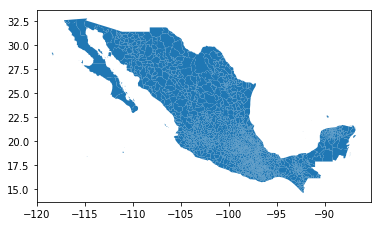

In [17]:
gdf = gpd.read_file('data/Municipios/')
gdf.plot()

In [9]:
gdf.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


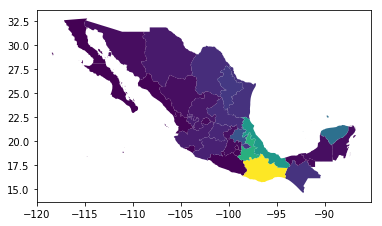

In [10]:
gdf.dissolve('CVE_ENT', aggfunc='sum').plot(column='OID')


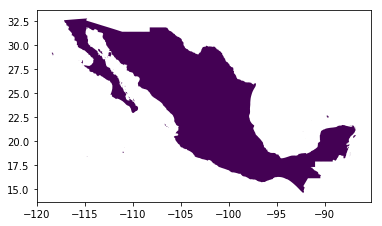

In [11]:
gdf['x']='x'
gdf.dissolve('x').plot(column='OID')

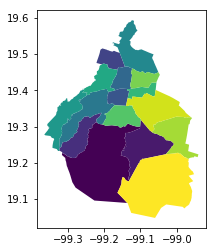

In [18]:

gdf = gdf.loc[gdf.CVE_ENT=='09',:]
gdf.plot(column='OID')


### Joins espaciales

In [19]:
df.head()

,Unnamed: 0,timestamp,x,y,speed,provider,geometry
739955,2111925,2017-03-30T03:54:43Z,-92.272708,14.901634,0.0,1,POINT (-92.27270799999999 14.901634)
329245,481111,2017-03-30T00:45:46Z,-97.659204,18.874581,0.0,1,POINT (-97.659204 18.874581)
34264,11128068,2017-03-30T22:35:51Z,-103.326460,20.587517,0.0,4,POINT (-103.32646 20.587517)
567242,4993557,2017-03-30T12:52:17Z,-98.944279,19.374716,11.0,1,POINT (-98.94427899999999 19.374716)
584615,2005017,2017-03-30T03:40:26Z,-99.172634,19.483471,10.0,1,POINT (-99.172634 19.483471)


In [20]:
gdf.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


In [29]:
u = gpd.sjoin(gdf,df,how='inner',op='intersects')
u

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,index_right,Unnamed: 0,timestamp,x,y,speed,provider
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",618881,7589678,2017-03-30T16:57:33Z,-99.225950,19.294440,16.09340,5
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",978918,503540,2017-03-30T00:46:49Z,-99.220900,19.311060,34.00000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",373454,10414987,2017-03-30T21:20:19Z,-99.155050,19.248340,66.00000,1
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",79284,8147661,2017-03-30T17:50:08Z,-99.173980,19.249930,0.00000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",775157,2033682,2017-03-30T03:41:27Z,-99.160430,19.256710,0.00000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",64167,54146,2017-03-30T00:04:36Z,-99.173530,19.259232,0.00000,4
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",484975,2177880,2017-03-30T04:04:36Z,-99.165223,19.266035,39.00000,1
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",398486,406901,2017-03-30T00:37:26Z,-99.170900,19.267170,0.00000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",835362,6295932,2017-03-30T14:59:44Z,-99.175125,19.268028,7.00000,1
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",102624,2821941,2017-03-30T05:54:03Z,-99.163320,19.272610,53.10822,5


In [ ]:
pip install rtree
conda install -c conda-forge rtree

instalación 

Ubuntu: 
    
- Descargar spatialindex de http://download.osgeo.org/libspatialindex/spatialindex-src-1.7.0.tar.gz
- descomprimir
- cambiar al directorio
- sudo su
- ./configue
- make
- make install
- ldconfig
- easy_install Rtree

Windows:

- conda install -c conda-forge rtree

info: http://toblerity.org/rtree/

In [30]:
df = u
df.crs

{'init': 'epsg:4326'}

In [31]:
df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,index_right,Unnamed: 0,timestamp,x,y,speed,provider
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",618881,7589678,2017-03-30T16:57:33Z,-99.22595,19.29444,16.0934,5
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",978918,503540,2017-03-30T00:46:49Z,-99.22090,19.31106,34.0000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",373454,10414987,2017-03-30T21:20:19Z,-99.15505,19.24834,66.0000,1
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",79284,8147661,2017-03-30T17:50:08Z,-99.17398,19.24993,0.0000,2
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,...",775157,2033682,2017-03-30T03:41:27Z,-99.16043,19.25671,0.0000,2


In [58]:
df.head()

,Unnamed: 0,timestamp,x,y,speed,provider,geometry
275637,8297823,2017-03-30T18:03:54Z,-99.318210,19.626100,0.0,2,POINT (-99.31820999999999 19.6261)
347647,1075981,2017-03-30T01:44:18Z,-98.140300,24.844090,0.0,2,POINT (-98.1403 24.84409)
680952,96924,2017-03-30T00:09:10Z,-99.083255,19.367040,0.0,1,POINT (-99.08325499999999 19.36704)
654055,9436404,2017-03-30T19:46:48Z,-99.310634,19.487589,71.0,1,POINT (-99.31063399999999 19.487589)
805096,570490,2017-03-30T00:54:08Z,-86.873860,21.042484,0.0,4,POINT (-86.87385999999999 21.042484)


In [32]:
df = df.to_crs({'init':'epsg:3395'})

In [33]:
df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,index_right,Unnamed: 0,timestamp,x,y,speed,provider
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",618881,7589678,2017-03-30T16:57:33Z,-99.22595,19.29444,16.0934,5
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",978918,503540,2017-03-30T00:46:49Z,-99.22090,19.31106,34.0000,2
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",373454,10414987,2017-03-30T21:20:19Z,-99.15505,19.24834,66.0000,1
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",79284,8147661,2017-03-30T17:50:08Z,-99.17398,19.24993,0.0000,2
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",775157,2033682,2017-03-30T03:41:27Z,-99.16043,19.25671,0.0000,2


In [34]:
df['AREA']=df.area  ## que onda con esto?


In [35]:
u = df.groupby(['NOM_MUN','CVE_ENT','CVE_MUN'])\
                    .AREA.agg(['count','mean'])

In [37]:
u.head()

,,,count,mean
NOM_MUN,CVE_ENT,CVE_MUN,,
Azcapotzalco,09,002,72,3.769174e+07
Benito Ju�rez,09,014,51,2.998339e+07
Coyoac�n,09,003,63,6.051081e+07
Cuajimalpa de Morelos,09,004,22,8.019867e+07
Cuauht�moc,09,015,109,3.654538e+07


In [39]:
u.columns = ['numero de probes','area']
u.head()

,,,numero de probes,area
NOM_MUN,CVE_ENT,CVE_MUN,,
Azcapotzalco,09,002,72,3.769174e+07
Benito Ju�rez,09,014,51,2.998339e+07
Coyoac�n,09,003,63,6.051081e+07
Cuajimalpa de Morelos,09,004,22,8.019867e+07
Cuauht�moc,09,015,109,3.654538e+07


In [41]:
u['densidad_probes']=u['numero de probes']/u['area']  # por qué no u.count/u.mean ?
u.head()

,,,numero de probes,area,densidad_probes
NOM_MUN,CVE_ENT,CVE_MUN,,,
Azcapotzalco,09,002,72,3.769174e+07,1.910233e-06
Benito Ju�rez,09,014,51,2.998339e+07,1.700942e-06
Coyoac�n,09,003,63,6.051081e+07,1.041136e-06
Cuajimalpa de Morelos,09,004,22,8.019867e+07,2.743188e-07
Cuauht�moc,09,015,109,3.654538e+07,2.982593e-06


In [42]:
u = u.reset_index()
u.head()

,NOM_MUN,CVE_ENT,CVE_MUN,numero de probes,area,densidad_probes
0,Azcapotzalco,09,002,72,3.769174e+07,1.910233e-06
1,Benito Ju�rez,09,014,51,2.998339e+07,1.700942e-06
2,Coyoac�n,09,003,63,6.051081e+07,1.041136e-06
3,Cuajimalpa de Morelos,09,004,22,8.019867e+07,2.743188e-07
4,Cuauht�moc,09,015,109,3.654538e+07,2.982593e-06


In [43]:
gdf.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
index_left,,,,,
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


In [44]:
v = pd.merge(u,gdf,how='inner',on=['NOM_MUN','CVE_ENT','CVE_MUN'])
type(v)

pandas.core.frame.DataFrame

In [45]:
v = pd.merge(gdf,u,how='inner',on=['NOM_MUN','CVE_ENT','CVE_MUN'])
type(v)

geopandas.geodataframe.GeoDataFrame

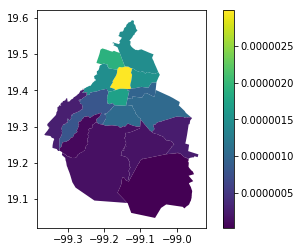

In [49]:
v.sort_values('densidad_probes',ascending=False).head(16)\
            .plot(column='densidad_probes',legend = True)

In [50]:
v = v.to_crs({'init': 'epsg:3395'})


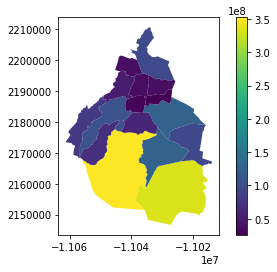

In [52]:
v['AREA'] = v.area
v.sort_values('AREA',ascending=False).plot(column='AREA',legend=True)

### Otras columnas geometry

In [53]:
df.head()


,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,index_right,Unnamed: 0,timestamp,x,y,speed,provider,AREA
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",618881,7589678,2017-03-30T16:57:33Z,-99.22595,19.29444,16.0934,5,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",978918,503540,2017-03-30T00:46:49Z,-99.22090,19.31106,34.0000,2,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",373454,10414987,2017-03-30T21:20:19Z,-99.15505,19.24834,66.0000,1,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",79284,8147661,2017-03-30T17:50:08Z,-99.17398,19.24993,0.0000,2,3.523801e+08
0,09,012,Tlalpan,1,"POLYGON ((-11042527.36057705 2176454.42710185,...",775157,2033682,2017-03-30T03:41:27Z,-99.16043,19.25671,0.0000,2,3.523801e+08


In [54]:
df.area.head()

0    3.523801e+08
0    3.523801e+08
0    3.523801e+08
0    3.523801e+08
0    3.523801e+08
dtype: float64

In [55]:
df['geometry2']=df.centroid

In [56]:
df['geometry3']=df.geometry

In [57]:
df.geometry = df.geometry2
df.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry,index_right,Unnamed: 0,timestamp,x,y,speed,provider,AREA,geometry2,geometry3
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),618881,7589678,2017-03-30T16:57:33Z,-99.22595,19.29444,16.0934,5,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),978918,503540,2017-03-30T00:46:49Z,-99.22090,19.31106,34.0000,2,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),373454,10414987,2017-03-30T21:20:19Z,-99.15505,19.24834,66.0000,1,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),79284,8147661,2017-03-30T17:50:08Z,-99.17398,19.24993,0.0000,2,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."
0,09,012,Tlalpan,1,POINT (-11043585.68608504 2164260.573296153),775157,2033682,2017-03-30T03:41:27Z,-99.16043,19.25671,0.0000,2,3.523801e+08,POINT (-11043585.68608504 2164260.573296153),"POLYGON ((-11042527.36057705 2176454.42710185,..."


In [58]:
df.area.head()

0    0.0
0    0.0
0    0.0
0    0.0
0    0.0
dtype: float64


## Operaciones booleanas


In [59]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),Polygon([(3,3), (5,3), (5,5), (3,5)])])

In [60]:
df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

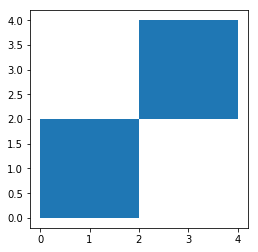

In [62]:
df1.plot()

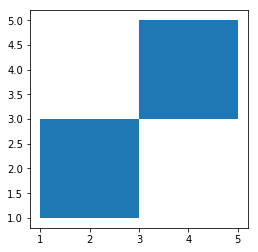

In [63]:
df2.plot()

In [64]:
df1.area

0    4.0
1    4.0
dtype: float64

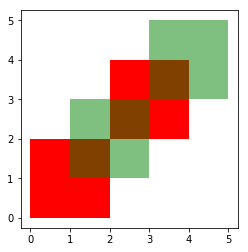

In [65]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

In [66]:
res_union = gpd.overlay(df1, df2, how='union')

In [67]:
res_union

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1.0,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
3,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
4,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
5,2.0,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
6,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
7,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"
8,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


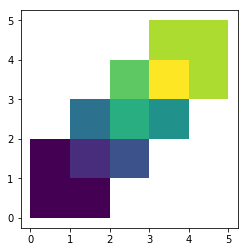

In [68]:
res_union = gpd.overlay(df1, df2, how='union')
res_union['x']=list(range(len(res_union)))
res_union.plot(column='x')


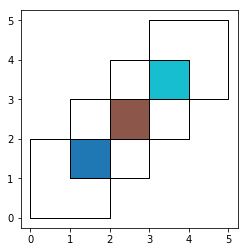

In [69]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
res_intersection['x']=list(range(len(res_intersection)))

ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

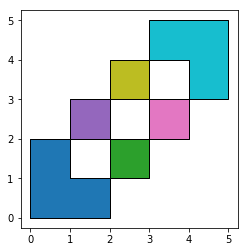

In [71]:
res_symdiff = gpd.overlay(df2, df1, how='symmetric_difference')



ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')

df2.plot(ax=ax, facecolor='none', edgecolor='k')

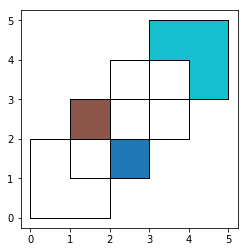

In [72]:
res_difference = gpd.overlay(df2, df1, how='difference')


ax = res_difference.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

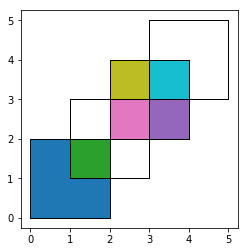

In [73]:
res_identity = gpd.overlay(df1, df2, how='identity')


ax = res_identity.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k')

df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [ ]:
gdf.difference(other)

gdf.intersection(other)

gdf.symmetric_difference(other)

gdf.union(other)

### Geocoding y Geocoding inverso

pip install geopy


In [74]:
gdf = pd.read_csv('data/Coppel.csv').sample(10)
gdf.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
952,953,6704526,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,AVENIDA,AQUILES SERDÁN,CALLE,...,Tierra Blanca,0231,30,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,18.450829,-96.352326,ENERO 2016
984,985,6407293,COPPEL CANADA ZAPATERÍA MIGUEL ALEMÁN 955,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,MIGUEL ALEMÁN,CALLE,...,Alto Lucero,0168,1,2.798271e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.622964,-96.733620,DICIEMBRE 2014
1071,1072,6282277,COPPEL CANADA ZAPATERÍA MERCADO TERÁN 525,COPPEL SA DE CV,463310,Comercio al por menor de calzado,11 a 30 personas,CALLE,ADOLFO TORRES,CALLE,...,Aguascalientes,0572,21,4.499150e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.883677,-102.297821,JULIO 2010
647,648,6375480,COPPEL 2 DE ABRIL 450,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,2 DE ABRIL,AVENIDA,...,Heroica Ciudad de Juchitán de Zaragoza,0363,2,9.712811e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,16.433318,-95.021200,JULIO 2010
366,367,6391504,COPPEL CORONA 968,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,CORONA ARAIZA,CALLE,...,Autlán de Navarro,0077,29,3.173826e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.770626,-104.367616,DICIEMBRE 2014


In [75]:
from shapely.geometry import Point, Polygon, LineString
l = [Point(xy) for xy in zip(gdf.latitud,gdf.longitud)]
l[0:l5]

In [76]:
gdf = gpd.GeoDataFrame(gdf,geometry=l)
gdf.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
952,953,6704526,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,AVENIDA,AQUILES SERDÁN,CALLE,...,0231,30,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,18.450829,-96.352326,ENERO 2016,POINT (18.45082873 -96.35232557)
984,985,6407293,COPPEL CANADA ZAPATERÍA MIGUEL ALEMÁN 955,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,MIGUEL ALEMÁN,CALLE,...,0168,1,2.798271e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.622964,-96.733620,DICIEMBRE 2014,POINT (19.62296423 -96.73362021)
1071,1072,6282277,COPPEL CANADA ZAPATERÍA MERCADO TERÁN 525,COPPEL SA DE CV,463310,Comercio al por menor de calzado,11 a 30 personas,CALLE,ADOLFO TORRES,CALLE,...,0572,21,4.499150e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.883677,-102.297821,JULIO 2010,POINT (21.88367662 -102.29782133)
647,648,6375480,COPPEL 2 DE ABRIL 450,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,2 DE ABRIL,AVENIDA,...,0363,2,9.712811e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,16.433318,-95.021200,JULIO 2010,POINT (16.43331829 -95.02119989000001)
366,367,6391504,COPPEL CORONA 968,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,CALLE,CORONA ARAIZA,CALLE,...,0077,29,3.173826e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.770626,-104.367616,DICIEMBRE 2014,POINT (19.77062641 -104.36761641)


In [77]:
gdf = gdf.fillna(0)
gdf['direccion'] = gdf.nom_vial+' '+\
                    gdf.numero_ext.astype(int).astype(str)\
                    +', '+gdf.cod_postal.astype(int).astype(str)\
                    +', '+gdf.municipio
gdf[['direccion','geometry']].head()

,direccion,geometry
952,"AQUILES SERDÁN 1400, 95150, Tierra Blanca",POINT (18.45082873 -96.35232557)
984,"MIGUEL ALEMÁN 410, 91460, Alto Lucero de Gutié...",POINT (19.62296423 -96.73362021)
1071,"ADOLFO TORRES 328, 20000, Aguascalientes",POINT (21.88367662 -102.29782133)
647,"2 DE ABRIL 79, 70000, Heroica Ciudad de Juchit...",POINT (16.43331829 -95.02119989000001)
366,"CORONA ARAIZA 32, 48900, Autlán de Navarro",POINT (19.77062641 -104.36761641)


In [78]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("175 5th Avenue NYC")
location

Location(Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America, (40.7410861, -73.9896298241625, 0.0))

In [80]:
gdf['coordenadas'] = gdf.head(5).direccion.apply(geolocator.geocode)

In [81]:
gdf['coordenadas']

952     (Aquiles Serdán, Obrera, Tierra Blanca, Veracr...
984                                                  None
1071    (Adolfo Torres, Macro Espacio para la Cultura ...
647                                                  None
366     (Corona Araiza, Autlán de Navarro, Jalisco, 48...
873                                                   NaN
874                                                   NaN
920                                                   NaN
503                                                   NaN
723                                                   NaN
Name: coordenadas, dtype: object

In [82]:
gdf.iloc[2,:].coordenadas



Location(Adolfo Torres, Macro Espacio para la Cultura y las Artes - MECA, Aguascalientes, 20000, México, (21.8838055, -102.2978529, 0.0))

In [83]:
location = geolocator.reverse("22.23051478,-102.32095893")
location.address

'Coppel, Avenida Morelos, Ganaderia, Rincón de Romos, Aguascalientes, 20408, México'

## Datos

### Descargando los datos diréctamente

http://www.conabio.gob.mx/informacion/gis/

http://geo.datos.gob.mx/geoserver/web/wicket/bookmarkable/org.geoserver.web.demo.MapPreviewPage?1

http://www.inegi.org.mx/geo/contenidos/geoestadistica/m_geoestadistico.aspx

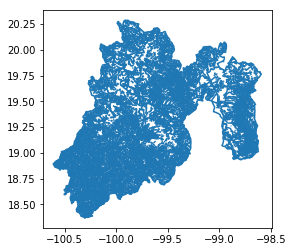

In [85]:
hidro_lotica = gpd.read_file('hidrolingw/')
hidro_lotica.plot()

In [86]:
hidro_lotica.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,CLAVE,DESCRIPCIO,geometry
0,33,22,0,0,0.001955,1,300,300,Corriente perenne,LINESTRING (-99.97987072466347 19.061237923737...
1,3,35,0,0,0.003592,2,300,300,Corriente perenne,LINESTRING (-99.90912671381362 19.063515884832...
2,37,27,0,0,0.000780,3,310,310,Corriente intermitente,LINESTRING (-99.48174837533675 19.062813397942...
3,2,38,0,0,0.005037,4,300,300,Corriente perenne,LINESTRING (-99.77364114578728 19.064206107756...
4,38,44,0,0,0.002245,5,300,300,Corriente perenne,LINESTRING (-99.77777412678614 19.061685471564...


In [87]:
hidro_lotica.groupby('DESCRIPCIO').size()



DESCRIPCIO
Acueductos                  570
Canales                    2035
Corriente intermitente    20792
Corriente perenne          4510
L¡mite estatal               19
dtype: int64

## Conectándose a un api

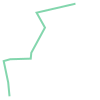

In [99]:
import requests
params={'geometries':'geojson'}
p1 = '19.3711, -99.5639'
p2 = '19.2862, -99.5859'
ruta=requests.get('http://router.project-osrm.org/route/v1/driving/13.388860,52.517037;13.397634,52.529407',params=params)

r = ruta.json()['routes']

distancia = r[0]['distance']
duration = r[0]['duration']
ruta=LineString(r[0]['geometry']['coordinates'])
ruta

In [98]:
ruta.json()['routes'][0]['geometry']['coordinates']

[[13.3888, 52.517033],
 [13.388625, 52.518883],
 [13.388024, 52.52175],
 [13.388898, 52.521997],
 [13.391643, 52.522074],
 [13.391718, 52.522858],
 [13.393549, 52.526228],
 [13.392425, 52.528233],
 [13.397631, 52.529432]]

In [ ]:
df.to_file('geoDF.geojson', driver="GeoJSON")

In [ ]:
gdf.to_file('CDMX')

# Hora de jugar

** Quiz ** Modifica el código para obtener la columna coordenadas como una geometria a partir de una dirección. ** Hint **Usa funciones apply

** Quiz ** Crea una función apply que te devuelva la dirección si le envias un objeto Point()

**Quiz** Crea una función apply en la que le envías dos puntos y te devuelve la distancia del api osrm

** Quiz ** Crea un dataframe en el que obtengas una matriz con las distancias entre los centroides de las delegaciones de la CDMX, use el api de osrm


** Quiz ** Para los datos en probe.probe encuentra la delegación o municipio, la colonia (si tenemos los datos) y el distrito geoelectoral al que pertenecen

** Quiz ** Considerando un radio de 1km, encuentra el COPPEL que tiene una mayor  densidad de probes. **Hint**: Cambia el crs a mercator

 **Quiz** Calcula los km de rio por municipio en el Edo de México

** Quiz ** Calcula el número de puntos en los polígonos de los municipios.

¿Qué sigue?

Vale la pena echarle un ojo a algunas de las siguientes librerías dependiendo de sus intereses, entender para que sirve y en que les podría beneficiar aprender a utilizarlas

- sci-py: Cómputo científico, tiene un módulo para análisis espacial (scipy.spatial)
- scikit-learn: Machine Learning
- bokeh: Gráficas dinámicas
- pyspark: Cómputo de altas prestaciones
- osmnx: módulo para conectarse a osm de forma "sencilla"
- rasterio: datos raster
- pysal: análisis espacial
- folium: mapas Leaflet.js 
- cartopy: Herramientas cartográficas para python
- rasterstats:  
- geodjango: Framework para aplicaciones web geográficas (Advertencia: podría ser necesario saber Django
- geoplot: como seaborn pero espacial
